In [1]:
#note before starting. for versions <= 0.16.0. 
#You must edit the openspace.cfg file and change ScreenshotUseDate from true to false 

#connect to openspace and pause time
from websocket import create_connection
import json
url = "localhost:4682"
ws_endpoint = f"ws://localhost:4682/websocket"
ws = create_connection(ws_endpoint)
message = json.dumps({"topic": 4,
                  "type": "luascript",
                  "payload": {"function": "openspace.time.setPause",
                              "arguments": ["true"],
                              "return": False}})
ws.send(message)

131

In [2]:
#Goto your place on the globe
lat = 40.7208636
lon = -74.0094477
altitude = 220
message = json.dumps({"topic": 4,
                  "type": "luascript",
                  "payload": {"function": "openspace.globebrowsing.goToGeo",
                              "arguments": [lat,lon,altitude],
                              "return": False}})
ws.send(message)

163

In [88]:
#in OpenSpace look up at the stars
#this cell could later be replaced with openspace.navigation.getNavigationState, adding a 90 rotation to the up vector
#and then calling openspace.navigation.setNavigationState with the updated values


#import json
#message = json.dumps({"topic": 4,
#                  "type": "luascript",
#                  "payload": {"function": "openspace.navigation.getNavigationState",
#                              "arguments": [],
#                              "return": True}})
#ws.send(message)
#response = ws.recv()
#data = json.loads(response)
#print(response)
#navState = data['payload']['1']
#3D rotate here...does this depend on lat/lon?
#navState['Pitch'] = 0;
#navState['Yaw'] = 0;
#message = json.dumps({"topic": 4,
#                  "type": "luascript",
#                  "payload": {"function": "openspace.navigation.setNavigationState",
#                              "arguments": [json.dumps(navState)],
#                              "return": True}})
#ws.send(message)

In [3]:
#set your time
import time
import datetime

timestring = "2021-03-09T23:42:02.393"
timestamp = time.mktime(datetime.datetime.strptime(timestring, '%Y-%m-%dT%H:%M:%S.%f').timetuple())
j2000offset = datetime.datetime(2000,1,1,12) - datetime.datetime(1970,1,1)
timestamp -= j2000offset.total_seconds()

#set your interval and number of images
interval = 300 #in seconds
number_of_photos = 20

#loop, set time, take screenshot
for i in range(0, number_of_photos):
    message = json.dumps({"topic": 4,
                  "type": "luascript",
                  "payload": {"function": "openspace.time.setTime",
                              "arguments": [timestamp],
                              "return": False}})
    ws.send(message)
    time.sleep(0.1) #adjust if low fps
    message = json.dumps({"topic": 4,
                  "type": "luascript",
                  "payload": {"function": "openspace.takeScreenshot",
                              "arguments": [],
                              "return": False}})
    ws.send(message)
    time.sleep(0.25) #adjust if hires screenshot
    timestamp += interval
    print (".", end="", flush=True)


....................

img 1...img 2...img 3...img 4...img 5...img 6...img 7...img 8...img 9...img 10...img 11...img 12...img 13...img 14...img 15...img 16...img 17...img 18...img 19...img 20...

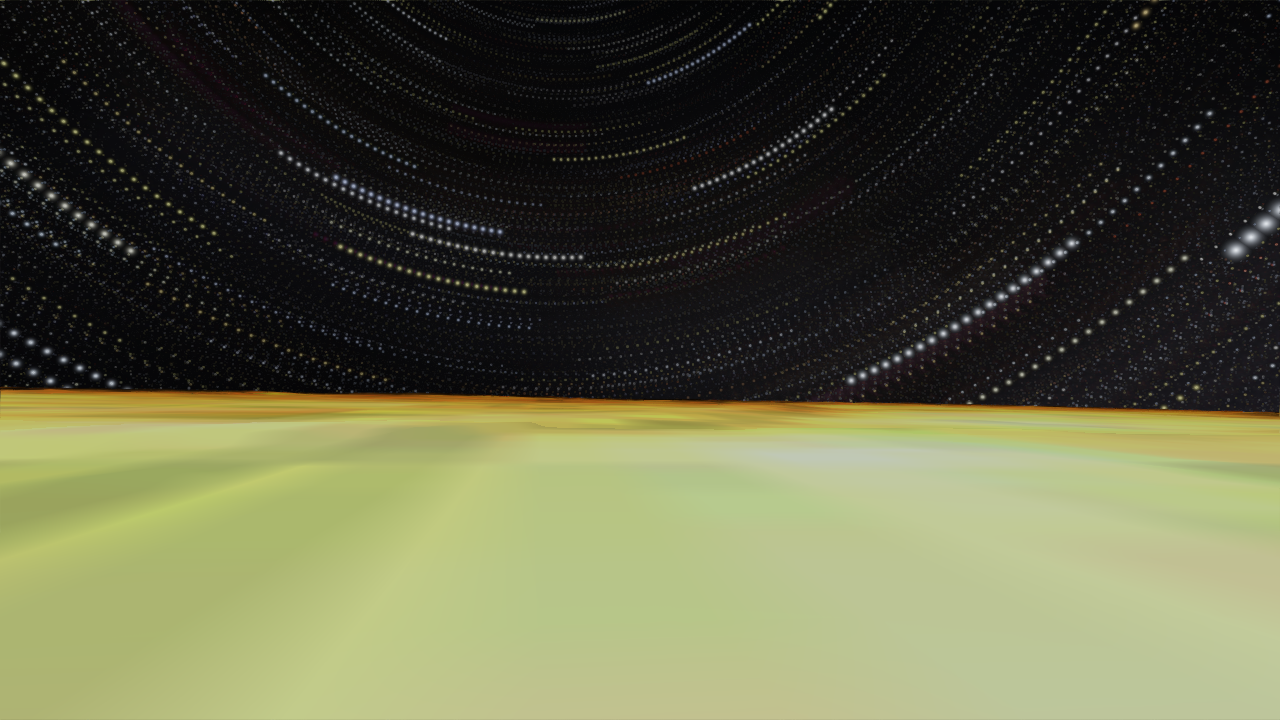

In [6]:
#This cell credit to James Headberg/CCNY Planetarium:
#https://ccnyplanetarium.org/posts/2020/06/23/martian-star-trails.html
import os, numpy
from PIL import Image
import IPython.display
import PIL.Image

imageDir = 'C:/os/OpenSpace-0.16.0/screenshots/'
files   = os.listdir(imageDir)
imagesToProcess  = [name for name in files if name[-4:] in [".png"]]
width, height = Image.open(imageDir+'/'+imagesToProcess[0]).size
theStack   = numpy.zeros((height, width, 3), numpy.float)
i = 1
for image in imagesToProcess:
    print ("img " + str(i) + "...", end="", flush=True)
    image_new = numpy.array(Image.open(imageDir+'/'+image), dtype = numpy.float)
    theStack     = numpy.maximum(theStack, image_new)
    i  += 1

theStack = numpy.array(numpy.round(theStack), dtype = numpy.uint8)
IPython.display.display(PIL.Image.fromarray(theStack))


In [7]:
#save file
output = Image.fromarray(theStack, mode = "RGB")
output.save("star-trails.png", "PNG")

In [110]:
#cleanup screenshots
import os
for file in os.listdir(imageDir):
    if file.endswith('.png'):
        os.remove(imageDir+file)
#close websocket
ws.close()

In [93]:
#thanks